<center><h1>Hong_Seungil_HW8</h1></center>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

Import packages

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.stats import mode
import seaborn as sns
from sklearn.cluster import SpectralClustering


### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
# Data read
raw_df = pd.read_csv('..\data\wdbc.data', header=None)

In [3]:
raw_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
raw_df.replace({'M': 1, 'B': 0}, inplace=True)

In [5]:
X_df = raw_df.iloc[ :, 2:]
y_df = raw_df.iloc[:, 1:2]

In [6]:
# List of base feature names
base_features = [
    "radius", "texture", "perimeter", "area", 
    "smoothness", "compactness", "concavity", 
    "concave points", "symmetry", "fractal dimension"
]

# Creating new column names
new_column_names = []
for category in ['mean', 'SE', 'worst']:
    new_column_names.extend([f"{feature}-{category}" for feature in base_features])

# Assigning the new column names to the DataFrame
X_df.columns = new_column_names
y_df.columns = ['label']

### (b) Monte-Carlo Simulation

#### (i) Supervised Learning
##### Train an L1-penalized SVM to classify the data.Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs

In [58]:
# 1. Normalize the data
normal = Normalizer()
X_norm_array = normal.fit_transform(X_df)

In [59]:
X_norm_array

array([[ 0.36905562,  0.88311049, -0.28607517, -0.04555008],
       [ 0.4650453 ,  0.83552454, -0.25151463, -0.14957274],
       [ 0.76378018, -0.52123157,  0.38015153,  0.02103063],
       ...,
       [-0.16567159, -0.59454115,  0.77718941, -0.12267994],
       [-0.23090319, -0.54314116,  0.80298095, -0.0830842 ],
       [-0.645067  , -0.16699315,  0.68117898,  0.30331015]])

In [9]:
y_df

,label
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [60]:
X_norm_df = pd.DataFrame(X_norm_array, columns=X_df.columns)
X_norm_df

,variance,skewness,curtosis,entropy
0,0.369056,0.883110,-0.286075,-0.045550
1,0.465045,0.835525,-0.251515,-0.149573
2,0.763780,-0.521232,0.380152,0.021031
3,0.301268,0.829982,-0.349606,-0.313278
4,0.050902,-0.688796,0.706823,-0.152873
...,...,...,...,...
1367,0.193595,0.643125,-0.691221,-0.266693
1368,-0.168665,-0.592375,0.786715,0.041512
1369,-0.165672,-0.594541,0.777189,-0.122680
1370,-0.230903,-0.543141,0.802981,-0.083084


In [11]:
# 1 Setup storage
best_C_values = []

for i in range(30):
    # Random train test split each loop
    X_train_norm, X_test_norm, y_train, y_test = train_test_split(
        X_norm_df, y_df, test_size=0.2, random_state=i, stratify=y_df)
    X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_df.columns)
    X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_df.columns)
    
    best_scores = []
    
    # 2. Set up the L1-penalized SVM with GridSearchCV for 5-fold cross-validation
    svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    param_grid = {'C': np.logspace(1, 6, 10)}
    grid_search = GridSearchCV(svm, param_grid, cv=5)

    # 3. Train the model
    grid_search.fit(X_train_norm_df, y_train)

    # Record the best penalty parameter C and the best score
    best_C = grid_search.best_params_['C']
    best_score = grid_search.best_score_

    best_C_values.append(best_C)
    best_scores.append(best_score)

    # Print the results of the current iteration
    print(f"Run {i+1}: Best C = {best_C:.4f}, Best Score = {best_score:.4f}")

# Calculate the average of the best C values and best scores
average_best_C = np.mean(best_C_values)
average_best_score = np.mean(best_scores)

print(f"Average Best C over 30 runs: {average_best_C:.4f}")
print(f"Average Best Score over 30 runs: {average_best_score:.4f}")

Run 1: Best C = 5994.8425, Best Score = 0.9648
Run 2: Best C = 21544.3469, Best Score = 0.9495
Run 3: Best C = 5994.8425, Best Score = 0.9692
Run 4: Best C = 5994.8425, Best Score = 0.9626
Run 5: Best C = 21544.3469, Best Score = 0.9648
Run 6: Best C = 5994.8425, Best Score = 0.9626
Run 7: Best C = 77426.3683, Best Score = 0.9692
Run 8: Best C = 5994.8425, Best Score = 0.9670
Run 9: Best C = 278255.9402, Best Score = 0.9670
Run 10: Best C = 5994.8425, Best Score = 0.9736
Run 11: Best C = 5994.8425, Best Score = 0.9714
Run 12: Best C = 5994.8425, Best Score = 0.9648
Run 13: Best C = 21544.3469, Best Score = 0.9692
Run 14: Best C = 21544.3469, Best Score = 0.9692
Run 15: Best C = 5994.8425, Best Score = 0.9780
Run 16: Best C = 77426.3683, Best Score = 0.9560
Run 17: Best C = 5994.8425, Best Score = 0.9648
Run 18: Best C = 21544.3469, Best Score = 0.9604
Run 19: Best C = 77426.3683, Best Score = 0.9648
Run 20: Best C = 21544.3469, Best Score = 0.9648
Run 21: Best C = 1668.1005, Best Score

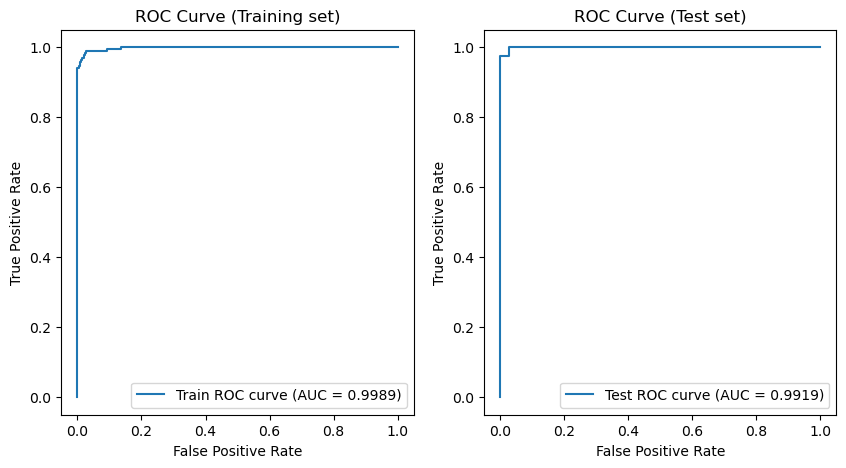

In [12]:
# Initialize lists to store metrics
accuracies_train, accuracies_test = [], []
precisions_train, precisions_test = [], []
recalls_train, recalls_test = [], []
f1s_train, f1s_test = [], []
aucs_train, aucs_test = [], []

# Monte-Carlo Simulation

for i in range(30):
    # Random train test split each loop
    X_train_norm, X_test_norm, y_train, y_test = train_test_split(
        X_norm_df, y_df, test_size=0.2, random_state=i, stratify=y_df)
    X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_df.columns)
    X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_df.columns)
    
    # Train the model
    model = LinearSVC(penalty='l1', C=average_best_C, dual=False, max_iter=10000)
    model.fit(X_train_norm_df, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_norm_df)
    y_test_pred = model.predict(X_test_norm_df)

    # Calculate metrics for training set
    accuracies_train.append(accuracy_score(y_train, y_train_pred))
    precisions_train.append(precision_score(y_train, y_train_pred))
    recalls_train.append(recall_score(y_train, y_train_pred))
    f1s_train.append(f1_score(y_train, y_train_pred))
    aucs_train.append(roc_auc_score(y_train, model.decision_function(X_train_norm_df)))

    # Calculate metrics for test set
    accuracies_test.append(accuracy_score(y_test, y_test_pred))
    precisions_test.append(precision_score(y_test, y_test_pred))
    recalls_test.append(recall_score(y_test, y_test_pred))
    f1s_test.append(f1_score(y_test, y_test_pred))
    aucs_test.append(roc_auc_score(y_test, model.decision_function(X_test_norm_df)))

# Calculate average of the metrics
avg_accuracy_train, avg_accuracy_test = np.mean(accuracies_train), np.mean(accuracies_test)
avg_precision_train, avg_precision_test = np.mean(precisions_train), np.mean(precisions_test)
avg_recall_train, avg_recall_test = np.mean(recalls_train), np.mean(recalls_test)
avg_f1_train, avg_f1_test = np.mean(f1s_train), np.mean(f1s_test)
avg_auc_train, avg_auc_test = np.mean(aucs_train), np.mean(aucs_test)

# Plot ROC Curve for the last run
fpr_train, tpr_train, _ = roc_curve(y_train, model.decision_function(X_train_norm_df))
fpr_test, tpr_test, _ = roc_curve(y_test, model.decision_function(X_test_norm_df))

plt.figure(figsize=(10, 5))

# Plot ROC Curve for the training set
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Train ROC curve (AUC = {avg_auc_train:.4f})')
plt.title('ROC Curve (Training set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Plot ROC Curve for the test set
plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label=f'Test ROC curve (AUC = {avg_auc_test:.4f})')
plt.title('ROC Curve (Test set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.show()


In [13]:
print("Average Metrics Over 30 Runs:")
print("Training Set:")
print(f"  Accuracy: {avg_accuracy_train:.4f}")
print(f"  Precision: {avg_precision_train:.4f}")
print(f"  Recall: {avg_recall_train:.4f}")
print(f"  F1-Score: {avg_f1_train:.4f}")
print(f"  AUC: {avg_auc_train:.4f}")
print("\nTesting Set:")
print(f"  Accuracy: {avg_accuracy_test:.4f}")
print(f"  Precision: {avg_precision_test:.4f}")
print(f"  Recall: {avg_recall_test:.4f}")
print(f"  F1-Score: {avg_f1_test:.4f}")
print(f"  AUC: {avg_auc_test:.4f}")

Average Metrics Over 30 Runs:
Training Set:
  Accuracy: 0.9856
  Precision: 0.9867
  Recall: 0.9747
  F1-Score: 0.9807
  AUC: 0.9989

Testing Set:
  Accuracy: 0.9617
  Precision: 0.9579
  Recall: 0.9389
  F1-Score: 0.9476
  AUC: 0.9919


In [14]:
# Confusion Matrix for the last run
cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training): \n", cm_train)
print("Confusion Matrix (Testing): \n", cm_test)

Confusion Matrix (Training): 
 [[281   4]
 [  6 164]]
Confusion Matrix (Testing): 
 [[72  0]
 [ 2 40]]


#### (ii) Semi-Supervised Learning/ Self-training

##### (A)

* Labeled data L1 Penalized SVM Fitting

In [15]:
# Initialize lists to store the best C values and best scores from each run
best_C_values_ssl = []

X_train_norm_df = X_train_norm_df.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
train_norm_df_all = pd.concat([X_train_norm_df, y_train], axis=1)

X_test_norm_df = X_test_norm_df.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
test_norm_df_all = pd.concat([X_test_norm_df, y_test], axis=1)

In [16]:
train_norm_df_all

,radius-mean,texture-mean,perimeter-mean,area-mean,smoothness-mean,compactness-mean,concavity-mean,concave points-mean,symmetry-mean,fractal dimension-mean,...,texture-worst,perimeter-worst,area-worst,smoothness-worst,compactness-worst,concavity-worst,concave points-worst,symmetry-worst,fractal dimension-worst,label
0,0.010822,0.012125,0.070601,0.546133,0.000065,0.000076,0.000063,0.000040,0.000125,0.000042,...,0.016975,0.086656,0.828268,0.000088,0.000150,0.000188,0.000082,0.000188,0.000055,1
1,0.016901,0.025661,0.110235,0.653713,0.000118,0.000140,0.000139,0.000059,0.000206,0.000083,...,0.030183,0.119789,0.736605,0.000147,0.000269,0.000321,0.000125,0.000285,0.000097,0
2,0.015360,0.016835,0.098693,0.651447,0.000106,0.000085,0.000050,0.000041,0.000234,0.000065,...,0.024110,0.109096,0.743054,0.000131,0.000191,0.000161,0.000111,0.000328,0.000077,0
3,0.014673,0.020440,0.095319,0.600758,0.000117,0.000124,0.000046,0.000034,0.000188,0.000069,...,0.027427,0.111082,0.784659,0.000177,0.000341,0.000289,0.000156,0.000383,0.000094,0
4,0.014353,0.022168,0.094122,0.595398,0.000108,0.000134,0.000113,0.000058,0.000183,0.000068,...,0.027704,0.114246,0.788327,0.000171,0.000450,0.000536,0.000240,0.000299,0.000114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.014656,0.018212,0.093589,0.622976,0.000093,0.000065,0.000015,0.000012,0.000171,0.000062,...,0.024953,0.106140,0.768164,0.000122,0.000143,0.000086,0.000054,0.000250,0.000076,0
451,0.018209,0.025126,0.118352,0.640225,0.000171,0.000183,0.000111,0.000071,0.000296,0.000099,...,0.030851,0.128500,0.746093,0.000222,0.000340,0.000361,0.000173,0.000437,0.000116,0
452,0.016648,0.028559,0.107291,0.593729,0.000145,0.000135,0.000060,0.000031,0.000265,0.000092,...,0.041099,0.124110,0.785457,0.000221,0.000423,0.000393,0.000116,0.000457,0.000128,0
453,0.009344,0.013114,0.060903,0.585355,0.000045,0.000048,0.000067,0.000045,0.000081,0.000026,...,0.017756,0.071951,0.803528,0.000054,0.000089,0.000149,0.000076,0.000119,0.000031,1


In [17]:
test_norm_df_all

,radius-mean,texture-mean,perimeter-mean,area-mean,smoothness-mean,compactness-mean,concavity-mean,concave points-mean,symmetry-mean,fractal dimension-mean,...,texture-worst,perimeter-worst,area-worst,smoothness-worst,compactness-worst,concavity-worst,concave points-worst,symmetry-worst,fractal dimension-worst,label
0,0.014598,0.025407,0.097009,0.572541,0.000124,0.000205,0.000193,0.000078,0.000242,0.000083,...,0.034305,0.119810,0.803287,0.000202,0.000608,0.000715,0.000225,0.000388,0.000141,1
1,0.006829,0.007936,0.045167,0.491394,0.000028,0.000049,0.000057,0.000036,0.000056,0.000019,...,0.010154,0.060615,0.866265,0.000044,0.000121,0.000171,0.000076,0.000091,0.000026,1
2,0.013309,0.012469,0.086072,0.601378,0.000090,0.000081,0.000075,0.000040,0.000159,0.000051,...,0.015737,0.099043,0.786867,0.000112,0.000176,0.000227,0.000084,0.000240,0.000064,0
3,0.008548,0.012580,0.058416,0.527754,0.000040,0.000090,0.000078,0.000050,0.000083,0.000027,...,0.015859,0.078092,0.842133,0.000056,0.000233,0.000186,0.000085,0.000123,0.000044,1
4,0.007845,0.005154,0.052605,0.697401,0.000032,0.000042,0.000089,0.000045,0.000046,0.000015,...,0.005154,0.052605,0.697401,0.000032,0.000042,0.000089,0.000045,0.000046,0.000015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.016996,0.024027,0.107755,0.683236,0.000117,0.000049,0.000033,0.000038,0.000191,0.000076,...,0.029753,0.110168,0.712063,0.000127,0.000060,0.000063,0.000065,0.000259,0.000080,0
110,0.017032,0.031194,0.109796,0.597249,0.000164,0.000139,0.000068,0.000033,0.000274,0.000104,...,0.047839,0.125742,0.781110,0.000232,0.000249,0.000261,0.000091,0.000411,0.000132,0
111,0.008902,0.012691,0.059107,0.481032,0.000055,0.000095,0.000088,0.000041,0.000100,0.000034,...,0.017504,0.078464,0.870039,0.000082,0.000383,0.000340,0.000098,0.000171,0.000069,1
112,0.007280,0.008140,0.047773,0.463027,0.000036,0.000038,0.000054,0.000035,0.000058,0.000020,...,0.011348,0.068646,0.881222,0.000056,0.000116,0.000197,0.000088,0.000102,0.000028,1


In [18]:
best_scores_ssl = [] # Resetting

for i in range(30):

    positive_class = train_norm_df_all[train_norm_df_all['label'] == 1]
    negative_class = train_norm_df_all[train_norm_df_all['label'] == 0]

    # Use i as the random_state to change the split in each iteration
    positive_labeled, positive_unlabeled = train_test_split(positive_class, test_size=0.5, random_state=i)
    negative_labeled, negative_unlabeled = train_test_split(negative_class, test_size=0.5, random_state=i)

    # Combine the labeled data
    labeled_data = pd.concat([positive_labeled, negative_labeled])

    X_labeled = labeled_data.drop('label', axis=1)
    y_labeled = labeled_data['label']
    
    svm_ssl = LinearSVC(penalty='l1', dual=False, max_iter=10000)
    param_grid = {'C': np.logspace(1, 6, 10)}  # Adjust as needed
    grid_search_ssl = GridSearchCV(svm_ssl, param_grid, cv=5)

    # Train the model
    grid_search_ssl.fit(X_labeled, y_labeled)

    # Record the best penalty parameter C and the best score
    best_C_ssl = grid_search_ssl.best_params_['C']
    best_score_ssl = grid_search_ssl.best_score_

    best_C_values_ssl.append(best_C_ssl)
    best_scores_ssl.append(best_score_ssl)

    # Print the results of the current iteration
    print(f"Run {i+1}: Best C = {best_C_ssl:.4f}, Best Score = {best_score_ssl:.4f}")

# Calculate the average of the best C values and best scores
average_best_C_ssl = np.mean(best_C_values_ssl)
average_best_score_ssl = np.mean(best_scores_ssl)

print(f"\nAverage Best C over 30 runs: {average_best_C_ssl:.4f}")
print(f"Average Best Score over 30 runs: {average_best_score_ssl:.4f}")

Run 1: Best C = 77426.3683, Best Score = 0.9515
Run 2: Best C = 278255.9402, Best Score = 0.9561
Run 3: Best C = 278255.9402, Best Score = 0.9605
Run 4: Best C = 5994.8425, Best Score = 0.9694
Run 5: Best C = 278255.9402, Best Score = 0.9559
Run 6: Best C = 1668.1005, Best Score = 0.9561
Run 7: Best C = 5994.8425, Best Score = 0.9604
Run 8: Best C = 77426.3683, Best Score = 0.9604
Run 9: Best C = 21544.3469, Best Score = 0.9561
Run 10: Best C = 1000000.0000, Best Score = 0.9781
Run 11: Best C = 1668.1005, Best Score = 0.9338
Run 12: Best C = 77426.3683, Best Score = 0.9691
Run 13: Best C = 278255.9402, Best Score = 0.9557
Run 14: Best C = 5994.8425, Best Score = 0.9514
Run 15: Best C = 5994.8425, Best Score = 0.9340
Run 16: Best C = 464.1589, Best Score = 0.9381
Run 17: Best C = 5994.8425, Best Score = 0.9473
Run 18: Best C = 77426.3683, Best Score = 0.9429
Run 19: Best C = 278255.9402, Best Score = 0.9692
Run 20: Best C = 5994.8425, Best Score = 0.9563
Run 21: Best C = 1000000.0000, B

##### (B)

Average metrics for train:
  accuracy: 0.9964
  precision: 0.9968
  recall: 0.9935
  f1: 0.9952
  auc: 0.9999
Average metrics for test:
  accuracy: 0.9757
  precision: 0.9679
  recall: 0.9667
  f1: 0.9671
  auc: 0.9944


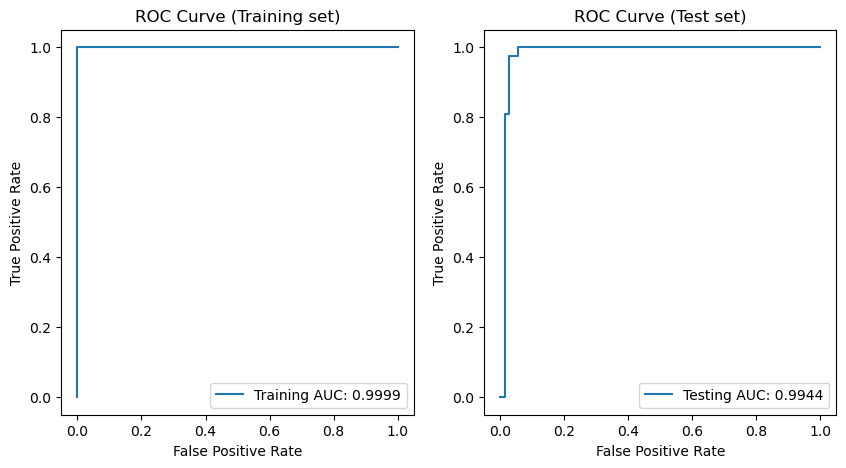

Confusion Matrix (Training): 
 [[290   0]
 [  0 165]]
Confusion Matrix (Testing): 
 [[70  2]
 [ 2 40]]


In [19]:
# Initialize metrics storage
metrics = {
    'train': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []},
    'test': {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
}

for run in range(30):
    positive_class = train_norm_df_all[train_norm_df_all['label'] == 1]
    negative_class = train_norm_df_all[train_norm_df_all['label'] == 0]

    # Split each class into labeled and unlabeled
    positive_labeled, positive_unlabeled = train_test_split(positive_class, test_size=0.5, random_state=run)
    negative_labeled, negative_unlabeled = train_test_split(negative_class, test_size=0.5, random_state=run)

    # Combine the labeled data and the unlabeled data
    labeled_data_st = pd.concat([positive_labeled, negative_labeled])
    unlabeled_data_st = pd.concat([positive_unlabeled, negative_unlabeled])

    # Extract features and labels for labeled data
    X_labeled_st = labeled_data_st.drop('label', axis=1)
    y_labeled_st = labeled_data_st['label']

    # Extract features for unlabeled data
    X_unlabeled_st = unlabeled_data_st.drop('label', axis=1)

    while len(X_unlabeled_st) > 0: # Continue this process until all unlabeled data are used.
        # Train the model on the current labeled data
        model = LinearSVC(penalty='l1', C=average_best_C_ssl, dual=False)
        model.fit(X_labeled_st, y_labeled_st)

        # Predict on the unlabeled data and select the most confident prediction
        decision_function = model.decision_function(X_unlabeled_st)
        most_confident_index = np.argmax(np.abs(decision_function)) #Find the unlabeled data point that is the farthest to the decision boundary
        most_confident_point = X_unlabeled_st.iloc[most_confident_index]
        most_confident_label = model.predict([most_confident_point])

        # Add the most confident point to the labeled data
        X_labeled_st = pd.concat([X_labeled_st, pd.DataFrame([most_confident_point])])
        y_labeled_st = np.append(y_labeled_st, most_confident_label)

        # Remove the confident point from the unlabeled data
        X_unlabeled_st = X_unlabeled_st.drop(X_unlabeled_st.index[most_confident_index])

    # Evaluate on the training set
    y_train_pred = model.predict(X_labeled_st)
    y_train_scores = model.decision_function(X_labeled_st)
    metrics['train']['accuracy'].append(accuracy_score(y_labeled_st, y_train_pred))
    metrics['train']['precision'].append(precision_score(y_labeled_st, y_train_pred))
    metrics['train']['recall'].append(recall_score(y_labeled_st, y_train_pred))
    metrics['train']['f1'].append(f1_score(y_labeled_st, y_train_pred))
    metrics['train']['auc'].append(roc_auc_score(y_labeled_st, y_train_scores))

    # Evaluate on the test set
    y_test_pred = model.predict(X_test_norm)
    y_test_scores = model.decision_function(X_test_norm)
    metrics['test']['accuracy'].append(accuracy_score(y_test, y_test_pred))
    metrics['test']['precision'].append(precision_score(y_test, y_test_pred))
    metrics['test']['recall'].append(recall_score(y_test, y_test_pred))
    metrics['test']['f1'].append(f1_score(y_test, y_test_pred))
    metrics['test']['auc'].append(roc_auc_score(y_test, y_test_scores))

# Average metrics calculation
average_metrics = {k: {metric: np.mean(values) for metric, values in v.items()} for k, v in metrics.items()}

# Print average metrics
for dataset in average_metrics:
    print(f"Average metrics for {dataset}:")
    for metric, value in average_metrics[dataset].items():
        print(f"  {metric}: {value:.4f}")

# Plot ROC and compute confusion matrix for the last run
fpr_train, tpr_train, _ = roc_curve(y_labeled_st, y_train_scores)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_train, tpr_train, label=f'Training AUC: {average_metrics["train"]["auc"]:.4f}')
plt.title('ROC Curve (Training set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fpr_test, tpr_test, label=f'Testing AUC: {average_metrics["test"]["auc"]:.4f}')
plt.title('ROC Curve (Test set)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()

cm_train = confusion_matrix(y_labeled_st, y_train_pred, labels=[0, 1])
cm_test = confusion_matrix(y_test, y_test_pred, labels=[0, 1])
print("Confusion Matrix (Training): \n", cm_train)
print("Confusion Matrix (Testing): \n", cm_test)

> The self-training loop is a form of semi-supervised learning where the model is iteratively retrained with additional data points that it labels itself. This can lead to better model performance as the training data grows.

#### (iii) Unsupervised Learning

#### Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

In [20]:
X_train_norm_df

,radius-mean,texture-mean,perimeter-mean,area-mean,smoothness-mean,compactness-mean,concavity-mean,concave points-mean,symmetry-mean,fractal dimension-mean,...,radius-worst,texture-worst,perimeter-worst,area-worst,smoothness-worst,compactness-worst,concavity-worst,concave points-worst,symmetry-worst,fractal dimension-worst
0,0.010822,0.012125,0.070601,0.546133,0.000065,0.000076,0.000063,0.000040,0.000125,0.000042,...,0.013381,0.016975,0.086656,0.828268,0.000088,0.000150,0.000188,0.000082,0.000188,0.000055
1,0.016901,0.025661,0.110235,0.653713,0.000118,0.000140,0.000139,0.000059,0.000206,0.000083,...,0.017991,0.030183,0.119789,0.736605,0.000147,0.000269,0.000321,0.000125,0.000285,0.000097
2,0.015360,0.016835,0.098693,0.651447,0.000106,0.000085,0.000050,0.000041,0.000234,0.000065,...,0.016613,0.024110,0.109096,0.743054,0.000131,0.000191,0.000161,0.000111,0.000328,0.000077
3,0.014673,0.020440,0.095319,0.600758,0.000117,0.000124,0.000046,0.000034,0.000188,0.000069,...,0.016733,0.027427,0.111082,0.784659,0.000177,0.000341,0.000289,0.000156,0.000383,0.000094
4,0.014353,0.022168,0.094122,0.595398,0.000108,0.000134,0.000113,0.000058,0.000183,0.000068,...,0.016535,0.027704,0.114246,0.788327,0.000171,0.000450,0.000536,0.000240,0.000299,0.000114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.014656,0.018212,0.093589,0.622976,0.000093,0.000065,0.000015,0.000012,0.000171,0.000062,...,0.016392,0.024953,0.106140,0.768164,0.000122,0.000143,0.000086,0.000054,0.000250,0.000076
451,0.018209,0.025126,0.118352,0.640225,0.000171,0.000183,0.000111,0.000071,0.000296,0.000099,...,0.019825,0.030851,0.128500,0.746093,0.000222,0.000340,0.000361,0.000173,0.000437,0.000116
452,0.016648,0.028559,0.107291,0.593729,0.000145,0.000135,0.000060,0.000031,0.000265,0.000092,...,0.019044,0.041099,0.124110,0.785457,0.000221,0.000423,0.000393,0.000116,0.000457,0.000128
453,0.009344,0.013114,0.060903,0.585355,0.000045,0.000048,0.000067,0.000045,0.000081,0.000026,...,0.010997,0.017756,0.071951,0.803528,0.000054,0.000089,0.000149,0.000076,0.000119,0.000031


##### (A) Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

> * Run k-means several times with different random initializations and choose the solution that minimizes the within-cluster sum of squares.

##### (B) & (C)

In [21]:
def get_majority_labels(X, y, centers, num_closest=30):
    majority_labels = []
    for center in centers:
        distances = np.linalg.norm(X - center, axis=1)
        closest_indices = np.argsort(distances)[:num_closest]
        closest_labels = y.iloc[closest_indices]
        majority_label = mode(closest_labels)[0][0]
        majority_labels.append(majority_label)
    return majority_labels

def predict_labels(X, centers, majority_labels):
    if isinstance(X, pd.DataFrame):
        X = X.values  # Convert to numpy array if X is a pandas DataFrame
    # Ensure centers is a 2D numpy array
    centers = np.atleast_2d(centers)
    distances = np.linalg.norm(X[:, np.newaxis, :] - centers[np.newaxis, :, :], axis=2)
    labels = np.argmin(distances, axis=1)
    return np.array([majority_labels[label] for label in labels])

def calculate_metrics(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='binary'),
        'recall': recall_score(y_true, y_pred, average='binary'),
        'f1_score': f1_score(y_true, y_pred, average='binary'),
        'auc': roc_auc_score(y_true, y_pred)
    }

# Initialize sums of metrics for both training and test sets
sum_metrics_train = {key: 0 for key in ['accuracy', 'precision', 'recall', 'f1_score', 'auc']}
sum_metrics_test = {key: 0 for key in ['accuracy', 'precision', 'recall', 'f1_score', 'auc']}

# Number of runs
M = 30
centroids_all_runs = []

for i in range(M):
    # Random train test split each loop
    X_train_norm, X_test_norm, y_train, y_test = train_test_split(
        X_norm_df, y_df, test_size=0.2, random_state=i, stratify=y_df)
    X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_df.columns)
    X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_df.columns)

    kmeans = KMeans(n_clusters=2).fit(X_train_norm_df)
    centroids_all_runs.append(kmeans.cluster_centers_)
    majority_labels = get_majority_labels(X_train_norm_df, y_train, kmeans.cluster_centers_)
    
    predicted_labels_train = predict_labels(X_train_norm_df, kmeans.cluster_centers_, majority_labels)
    predicted_labels_test = predict_labels(X_test_norm_df, kmeans.cluster_centers_, majority_labels)

    metrics_train = calculate_metrics(y_train, predicted_labels_train)
    metrics_test = calculate_metrics(y_test, predicted_labels_test)

    for key in sum_metrics_train.keys():
        sum_metrics_train[key] += metrics_train[key]
        sum_metrics_test[key] += metrics_test[key]

    print(f"<Iteration {i + 1}>\nTraining Accuracy: {metrics_train['accuracy']:.4f} / Test Accuracy: {metrics_test['accuracy']:.4f}\n")

average_metrics_train = {key: value / M for key, value in sum_metrics_train.items()}
average_metrics_test = {key: value / M for key, value in sum_metrics_test.items()}

print("Average Training Metrics:")
for metric, value in average_metrics_train.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nAverage Test Metrics:")
for metric, value in average_metrics_test.items():
    print(f"{metric.capitalize()}: {value:.4f}")

<Iteration 1>
Training Accuracy: 0.8769 / Test Accuracy: 0.9035

<Iteration 2>
Training Accuracy: 0.8989 / Test Accuracy: 0.8509

<Iteration 3>
Training Accuracy: 0.8857 / Test Accuracy: 0.9123

<Iteration 4>
Training Accuracy: 0.8879 / Test Accuracy: 0.8596

<Iteration 5>
Training Accuracy: 0.9165 / Test Accuracy: 0.8070

<Iteration 6>
Training Accuracy: 0.8945 / Test Accuracy: 0.8772

<Iteration 7>
Training Accuracy: 0.8879 / Test Accuracy: 0.8860

<Iteration 8>
Training Accuracy: 0.8923 / Test Accuracy: 0.8684

<Iteration 9>
Training Accuracy: 0.9099 / Test Accuracy: 0.8509

<Iteration 10>
Training Accuracy: 0.8813 / Test Accuracy: 0.8860

<Iteration 11>
Training Accuracy: 0.8879 / Test Accuracy: 0.8596

<Iteration 12>
Training Accuracy: 0.8813 / Test Accuracy: 0.9123

<Iteration 13>
Training Accuracy: 0.8813 / Test Accuracy: 0.8596

<Iteration 14>
Training Accuracy: 0.8901 / Test Accuracy: 0.8860

<Iteration 15>
Training Accuracy: 0.8923 / Test Accuracy: 0.8684

<Iteration 16>
Trai

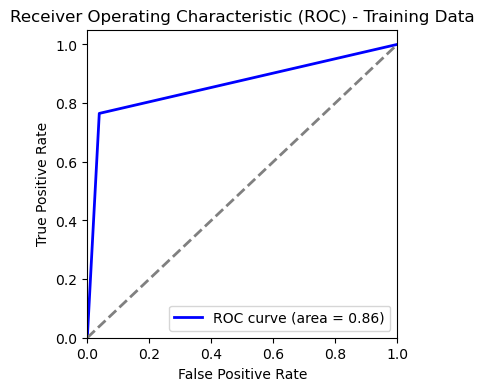

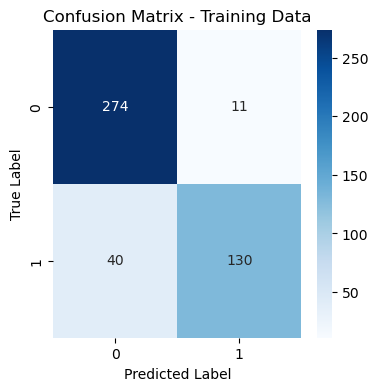

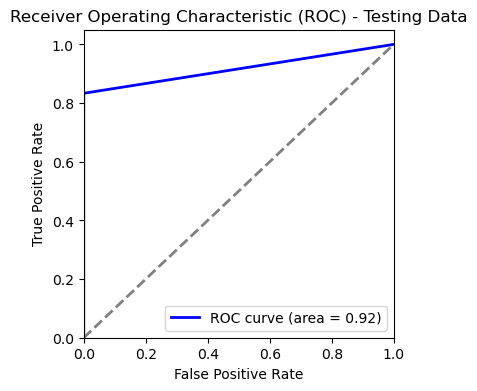

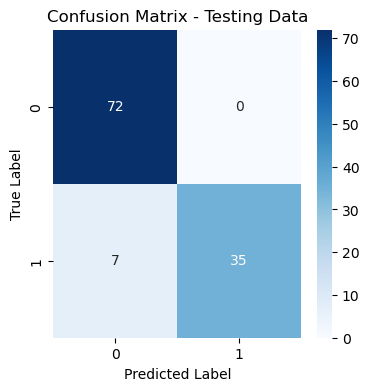

In [22]:
# Function to plot ROC Curve and Confusion Matrix
def plot_evaluation_metrics(y_true, y_pred, dataset_type):
    # Calculate False Positive Rate, True Positive Rate and thresholds for ROC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plotting ROC Curve
    plt.figure(figsize=(4, 4))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {dataset_type} Data')
    plt.legend(loc="lower right")
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plotting Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Confusion Matrix - {dataset_type} Data')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Assuming the last run's predicted labels for the training and test sets are stored in
# `predicted_labels_train` and `predicted_labels_test`, and the true labels are in `y_train` and `y_test`

# Plot metrics for training data
plot_evaluation_metrics(y_train, predicted_labels_train, "Training")

# Plot metrics for test data
plot_evaluation_metrics(y_test, predicted_labels_test, "Testing")

#### (iv) Spectral Clustering

In [23]:
# Count the instances of each class
unique, counts = np.unique(y_df, return_counts=True)
class_counts = dict(zip(unique, counts))

# Assuming binary classification (0 and 1)
p = class_counts.get(0, 0)  # Count of class 0
n = class_counts.get(1, 0)  # Count of class 1

In [24]:
def adjust_cluster_balance(labels, p, n):
    # Count the instances in each cluster
    cluster_counts = np.bincount(labels)
    if len(cluster_counts) < 2:
        return labels  # Not enough clusters to adjust

    # Identify the larger and smaller clusters
    if cluster_counts[0] > cluster_counts[1]:
        larger_cluster, smaller_cluster = 0, 1
    else:
        larger_cluster, smaller_cluster = 1, 0

    # Calculate how many points to move from larger to smaller cluster
    num_to_move = abs((p - n) // 2)

    # Indices of points to potentially move
    move_candidates = np.where(labels == larger_cluster)[0]

    # Randomly select points to reassign (for simplicity)
    np.random.shuffle(move_candidates)
    points_to_move = move_candidates[:num_to_move]

    # Adjust labels
    adjusted_labels = labels.copy()
    adjusted_labels[points_to_move] = smaller_cluster

    return adjusted_labels

def get_majority_labels(labels, y, num_closest=30):
    majority_labels = []
    unique_labels = np.unique(labels)
    for label in unique_labels:
        indices = np.where(labels == label)[0]
        if len(indices) > num_closest:
            closest_indices = indices[:num_closest]
        else:
            closest_indices = indices
        closest_labels = y.iloc[closest_indices]
        majority_label = mode(closest_labels)[0][0]
        majority_labels.append(majority_label)
    return majority_labels

def predict_labels(labels, majority_labels):
    return np.array([majority_labels[label] for label in labels])

def calculate_metrics(y_true, y_pred):
    # Adjustments may be needed if the problem is not binary classification
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='binary'),
        'recall': recall_score(y_true, y_pred, average='binary'),
        'f1_score': f1_score(y_true, y_pred, average='binary'),
        'auc': roc_auc_score(y_true, y_pred)
    }

In [25]:
from sklearn.metrics import silhouette_score
gamma_range = np.logspace(-2, 1, 20) 

best_gamma = None
best_score = -1  # For silhouette, higher is better. Adjust according to the metric used.

for gamma in gamma_range:
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=gamma, random_state=42)
    labels = spectral.fit_predict(X_train_norm_df)  # Adjust to use a validation set if available
    
    # Calculate the metric (e.g., silhouette score)
    score = silhouette_score(X_train_norm_df, labels)
    
    if score > best_score:
        best_score = score
        best_gamma = gamma

print(f"Best Gamma: {best_gamma} with a score of {best_score:.4f}")

Best Gamma: 10.0 with a score of 0.4954


In [26]:
# Initialize sums of metrics for both training and test sets
sum_metrics_train = {key: 0 for key in ['accuracy', 'precision', 'recall', 'f1_score', 'auc']}
sum_metrics_test = {key: 0 for key in ['accuracy', 'precision', 'recall', 'f1_score', 'auc']}

for i in range(M):
    # Random train test split each loop
    X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_norm_df, 
                                                                  y_df, 
                                                                  test_size=0.2, 
                                                                  random_state=i, 
                                                                  stratify=y_df)
    X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_df.columns)
    X_test_norm_df = pd.DataFrame(X_test_norm, columns=X_df.columns)

    # Apply spectral clustering
    spectral = SpectralClustering(n_clusters=2, affinity='rbf', gamma=best_gamma, random_state=0)
    cluster_labels = spectral.fit_predict(X_train_norm_df)

    # Adjust the cluster labels to match the desired balance
    adjusted_labels = adjust_cluster_balance(cluster_labels, p, n)

    train_labels = spectral.labels_
    majority_labels = get_majority_labels(train_labels, y_train)

    predicted_labels_train = predict_labels(train_labels, majority_labels)

    # For testing, need to fit the model on the full dataset to get the labels
    spectral.fit(X_test_norm_df)
    test_labels = spectral.labels_
    predicted_labels_test = predict_labels(test_labels, majority_labels)

    metrics_train = calculate_metrics(y_train, predicted_labels_train)
    metrics_test = calculate_metrics(y_test, predicted_labels_test)

    for key in sum_metrics_train.keys():
        sum_metrics_train[key] += metrics_train[key]
        sum_metrics_test[key] += metrics_test[key]

    print(f"Iteration {i + 1}:\nTraining Accuracy: {metrics_train['accuracy']:.4f} / Test Accuracy: {metrics_test['accuracy']:.4f}\n")

average_metrics_train = {key: value / M for key, value in sum_metrics_train.items()}
average_metrics_test = {key: value / M for key, value in sum_metrics_test.items()}

print("Average Training Metrics:")
for metric, value in average_metrics_train.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nAverage Test Metrics:")
for metric, value in average_metrics_test.items():
    print(f"{metric.capitalize()}: {value:.4f}")

Iteration 1:
Training Accuracy: 0.8725 / Test Accuracy: 0.8947

Iteration 2:
Training Accuracy: 0.8879 / Test Accuracy: 0.8246

Iteration 3:
Training Accuracy: 0.8703 / Test Accuracy: 0.8246

Iteration 4:
Training Accuracy: 0.8791 / Test Accuracy: 0.1228

Iteration 5:
Training Accuracy: 0.8923 / Test Accuracy: 0.7719

Iteration 6:
Training Accuracy: 0.8747 / Test Accuracy: 0.1579

Iteration 7:
Training Accuracy: 0.8769 / Test Accuracy: 0.1228

Iteration 8:
Training Accuracy: 0.8703 / Test Accuracy: 0.8684

Iteration 9:
Training Accuracy: 0.8879 / Test Accuracy: 0.1842

Iteration 10:
Training Accuracy: 0.8791 / Test Accuracy: 0.1053

Iteration 11:
Training Accuracy: 0.8703 / Test Accuracy: 0.8772

Iteration 12:
Training Accuracy: 0.8659 / Test Accuracy: 0.8947

Iteration 13:
Training Accuracy: 0.8725 / Test Accuracy: 0.1404

Iteration 14:
Training Accuracy: 0.8791 / Test Accuracy: 0.1316

Iteration 15:
Training Accuracy: 0.8813 / Test Accuracy: 0.1404

Iteration 16:
Training Accuracy: 0

#### (iv) Compare
#### One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods

> * For this specific dataset, First and second approach - L1 penalized SVM with "Supervised" and "Semi supervised learning method" were both very good at predicting labels, accuracy were almost similair to the both methods. Just little different with the test set prediction, since they have different recalls. They are superior than the unsupervised methods. 
> *  Supervised methods are usually effective for specific label prediction tasks due to their ability to learn directly from labeled examples. Unsupervised methods are valuable for discovering the underlying structure of data but might not align perfectly with specific label prediction objectives unless the natural groupings in the data closely correspond to the labels. 

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set

In [2]:
raw_banknote = "../data/data_banknote_authentication.txt"

df_raw_banknote = pd.read_csv(raw_banknote, header=None)
df_raw_banknote.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']


In [3]:
df_raw_banknote

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
X_df = df_raw_banknote.iloc[0:, 0:-1]
y_df = df_raw_banknote.iloc[0:, -1:]

In [5]:
X_df

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [6]:
y_df

,class
0,0
1,0
2,0
3,0
4,0
...,...
1367,1
1368,1
1369,1
1370,1


In [7]:
def choose_random_split(random_num):
    # Total data points
    total_points = 472 + 900

    # Points for test set
    test_points = 472

    # Calculating the test size ratio
    test_size_ratio = test_points / total_points

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=test_size_ratio, random_state=random_num)

    return X_train, X_test, y_train, y_test


In [8]:
X_train, X_test, y_train, y_test = choose_random_split(42)

# Print the size of each set to verify
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 900
Test set size: 472


### (b) Repeat each of the following two procedures 50 times

#### (i) Passive
#### Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [10]:
num_iterations = 50  # M value 
num_models = 90
test_errors_passive = np.zeros((num_iterations, num_models))

param_grid = {'C': np.logspace(-2, 6, 8)}

In [11]:
for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}:")

    X_train, X_test, y_train, y_test = choose_random_split(iteration)  # Re-split the dataset
    shuffled_indices = np.random.permutation(len(X_train))

    for model_num in range(1, num_models + 1):
        selected_indices = shuffled_indices[:model_num * 10]
        X_train_subset = X_train.iloc[selected_indices]
        y_train_subset = y_train.iloc[selected_indices]

        # Define the SVM with a linear kernel and L1 penalty
        svm = LinearSVC(penalty='l1', dual=False, max_iter=10000)

        # Set up the GridSearchCV with 5-fold cross-validation
        grid_search = GridSearchCV(svm, param_grid, cv=5)

        # Perform the grid search on the subset of data
        grid_search.fit(X_train_subset, y_train_subset)

        # Save the best model
        best_svm = grid_search.best_estimator_

        # Calculate test error
        y_pred = best_svm.predict(X_test)
        test_error = 1 - accuracy_score(y_test, y_pred)
        test_errors_passive[iteration, model_num - 1] = test_error
        
    # Test error for the model trained with the first 10 data points
    test_error_first = test_errors_passive[iteration, 0]  # first model (10 data points)
    print(f"  Model trained with 10 data points: Test Error = {test_error_first:.4f}")

    # Test error for the model trained with 900 data points
    test_error_last = test_errors_passive[iteration, num_models - 1]  # last model (900 data points)
    print(f"  Model trained with 900 data points: Test Error = {test_error_last:.4f}")

    # Separator between iterations for clarity
    print("-" * 30)
# Now test_errors contains 50 test errors for each of the 90 models

Iteration 1:
  Model trained with 10 data points: Test Error = 0.0445
  Model trained with 900 data points: Test Error = 0.0127
------------------------------
Iteration 2:
  Model trained with 10 data points: Test Error = 0.0551
  Model trained with 900 data points: Test Error = 0.0085
------------------------------
Iteration 3:
  Model trained with 10 data points: Test Error = 0.1780
  Model trained with 900 data points: Test Error = 0.0127
------------------------------
Iteration 4:
  Model trained with 10 data points: Test Error = 0.0614
  Model trained with 900 data points: Test Error = 0.0042
------------------------------
Iteration 5:
  Model trained with 10 data points: Test Error = 0.1695
  Model trained with 900 data points: Test Error = 0.0106
------------------------------
Iteration 6:
  Model trained with 10 data points: Test Error = 0.0085
  Model trained with 900 data points: Test Error = 0.0085
------------------------------
Iteration 7:
  Model trained with 10 data poin

#### (ii) Active
#### Train a SVM with a pool of 10 randomly selected data points from the training set5 using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. "Choose the 10 closest data points in the training set to the hyperplane of the SVM" and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [12]:
test_errors_active = []

for iteration in range(num_iterations):
    
    print(f"Iteration {iteration + 1}:")
    X_train, X_test, y_train, y_test = choose_random_split(iteration)  # Re-split the dataset

    choice_idx = np.arange(X_train.shape[0])
    selected_idx = []
    error_list = []
    
    np.random.shuffle(choice_idx)
    pool, choice_idx = choice_idx[:10], choice_idx[10:]
    selected_idx.extend(pool)
    
    while len(selected_idx) <= 900:
        selec_X_tr, selec_y_tr = X_train.iloc[selected_idx], y_train.iloc[selected_idx]

        # Define the SVM with a linear kernel and L1 penalty
        svm_act = LinearSVC(penalty='l1', dual=False)

        # Set up the GridSearchCV with 5-fold cross-validation
        grid_search_act = GridSearchCV(svm_act, param_grid, cv=5)

        # Perform the grid search on the subset of data
        grid_search_act.fit(selec_X_tr, selec_y_tr)
        
        # Save the best model
        best_svm_act = grid_search_act.best_estimator_

        # Calculate test error
        y_pred = best_svm_act.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)
        error_list.append(1 - report['accuracy'])
        
        if len(choice_idx) == 0:
            break
        
        dist = best_svm_act.decision_function(X_train.iloc[choice_idx])

        # Sorting Data Points Based on Distance from Decision Boundary:
        sortedarg = np.arange(len(choice_idx))
        sorted(sortedarg, key=lambda i : abs(dist[i]))

        # Selecting Data Points for Training:
        choice_idx = choice_idx[sortedarg]
        pool, choice_idx = choice_idx[:10], choice_idx[10:]
        selected_idx.extend(pool)
        
    test_errors_active.append(error_list)

    # first model (10 data points)
    print(f"  Model trained with 10 data points: Test Error = {error_list[0]:.4f}")

    # Test error for the model trained with 900 data points
    print(f"  Model trained with 900 data points: Test Error = {error_list[-1]:.4f}")

    # Separator between iterations for clarity
    print("-" * 30)

Iteration 1:
  Model trained with 10 data points: Test Error = 0.2288
  Model trained with 900 data points: Test Error = 0.0127
------------------------------
Iteration 2:
  Model trained with 10 data points: Test Error = 0.0318
  Model trained with 900 data points: Test Error = 0.0085
------------------------------
Iteration 3:
  Model trained with 10 data points: Test Error = 0.1356
  Model trained with 900 data points: Test Error = 0.0127
------------------------------
Iteration 4:
  Model trained with 10 data points: Test Error = 0.0826
  Model trained with 900 data points: Test Error = 0.0042
------------------------------
Iteration 5:
  Model trained with 10 data points: Test Error = 0.0657
  Model trained with 900 data points: Test Error = 0.0106
------------------------------
Iteration 6:
  Model trained with 10 data points: Test Error = 0.1907
  Model trained with 900 data points: Test Error = 0.0085
------------------------------
Iteration 7:
  Model trained with 10 data poin

### (c) Average the 50 test errors

In [13]:
# Calculate average test errors for each model
average_test_errors_passive = np.mean(test_errors_passive, axis=0)

# Calculate average test errors for each model
average_test_errors_active = np.array(test_errors_active)
average_test_errors_active = np.mean(test_errors_active, axis=0)

# Number of training instances for each model
training_instances = np.arange(10, 901, 10)  # 10, 20, ..., 900

> * Learning curve plot

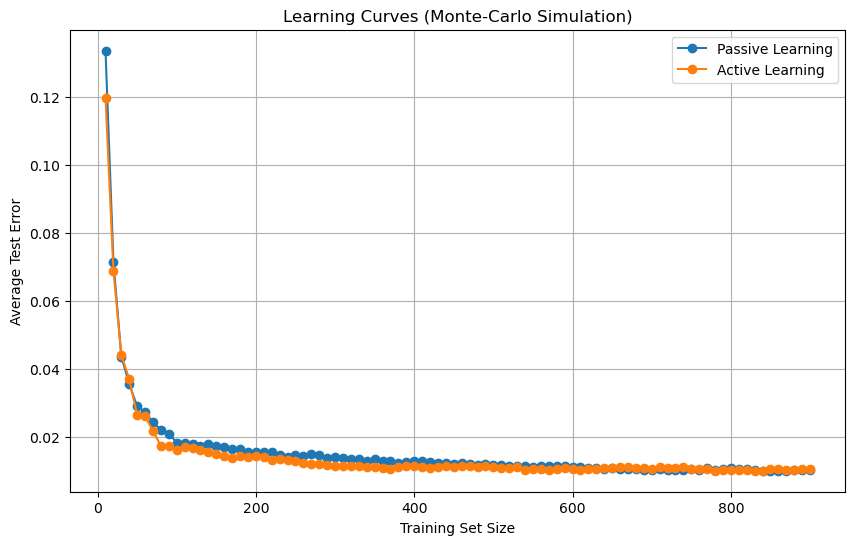

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(training_instances, average_test_errors_passive, marker='o', label="Passive Learning")
plt.plot(training_instances, average_test_errors_active, marker='o', label="Active Learning")
plt.title('Learning Curves (Monte-Carlo Simulation)')
plt.xlabel('Training Set Size')
plt.ylabel('Average Test Error')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

Passive Learning:

In passive learning, the learning algorithm is given a random subset of the available data without any specific strategy in the selection process. The algorithm treats all data points as equally informative for the learning task.
This means that for your SVM classifier, a set of data points (features and their corresponding labels) would be randomly chosen from your dataset and used to train the model.
The key characteristic of passive learning is that it doesn't interact with the data selection process. It's a more traditional approach where the entire dataset, or a randomly selected subset of it, is used for training without considering the potential informativeness of each data point.

Active Learning:

Active learning, on the other hand, is a more dynamic and interactive form of learning. The learning algorithm actively queries or selects the most informative data points from the available dataset for training.
In your case, the SVM classifier would not just passively receive data to learn from; instead, it would actively select which data points it wants to learn from next. For example, it might choose data points that are closest to the decision boundary, as these are often the most informative for improving the classifier's accuracy.
This method is particularly useful when labeled data is scarce or expensive to obtain. By actively selecting the most informative data points, the model can achieve higher accuracy with fewer training samples compared to passive learning.

In summary, while passive learning uses a random or predetermined set of data without interaction, active learning involves the model in the data selection process, choosing data that is deemed most beneficial for learning. This can lead to more efficient learning, requiring fewer data points to achieve a certain level of performance.